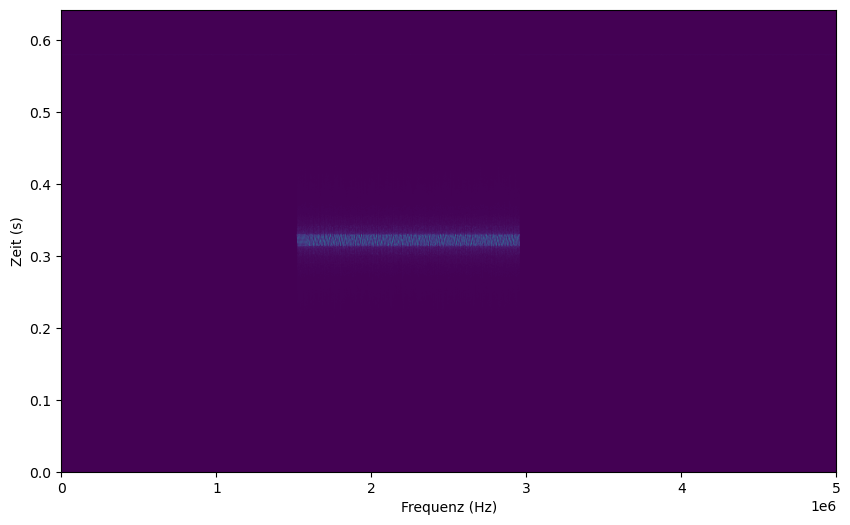

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import soundfile as sf

# Datei einlesen
data, samplerate = sf.read('15-08-28_435500000Hz.wav')

if len(data.shape) > 1:
    # Konvertiere zu Mono durch Mittelung der Kanäle
    data = np.mean(data, axis=1)

# FFT-Einstellungen
N = 1024
T = 1.0 / samplerate
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# Erstelle das Wasserfalldiagramm
plt.figure(figsize=(10, 6))
spectrogram = []
for i in range(0, len(data), N):
    yf = scipy.fftpack.fft(data[i:i+N])
    spectrogram.append(2.0/N * np.abs(yf[:N//2]))
plt.imshow(np.flipud(np.transpose(spectrogram)), aspect='auto', extent=[xf[0], xf[-1], 0, len(data)/samplerate])
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Zeit (s)')
plt.show()


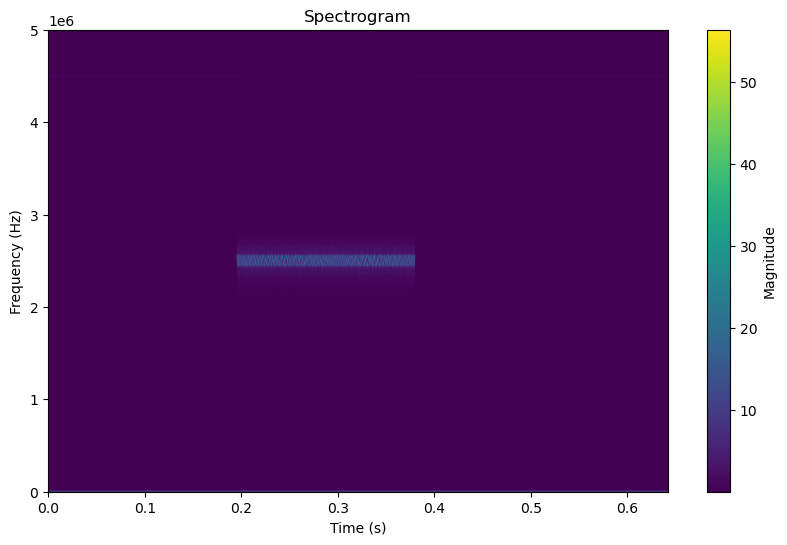

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from matplotlib.widgets import Slider, Button

# Funktion zur Berechnung des Spektrums
def calculate_spectrum(data, sample_rate, window_size=1024, overlap=0.5):
    hop_size = int(window_size * (1 - overlap))
    num_samples = len(data)
    num_frames = int(np.ceil((num_samples - window_size) / hop_size)) + 1
    spectrum = np.zeros((num_frames, window_size // 2 + 1))

    for i in range(num_frames):
        start = i * hop_size
        end = min(start + window_size, num_samples)
        frame = data[start:end] * np.hanning(end - start)
        spectrum[i] = np.abs(np.fft.rfft(frame, window_size))

    freqs = np.fft.rfftfreq(window_size, 1 / sample_rate)
    times = np.arange(num_frames) * hop_size / sample_rate
    return times, freqs, spectrum

# Einlesen der WAV-Datei
filename = '15-08-28_435500000Hz.wav'
data, sample_rate = sf.read(filename)
data = data[:,0]

# Berechnung des Spektrums
times, freqs, spectrum = calculate_spectrum(data, sample_rate)

# Erstellen des Plots
fig, ax = plt.subplots(figsize=(10, 6))
img = ax.imshow(spectrum.T, aspect='auto', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, label='Magnitude')

# Hinzufügen von Widgets für Interaktionen
axzoom = plt.axes([0.1, 0.05, 0.65, 0.03])
axpan = plt.axes([0.1, 0.01, 0.65, 0.03])
szoom = Slider(axzoom, 'Zoom', 0.1, 10.0, valinit=1)
span = Slider(axpan, 'Pan', times.min(), times.max(), valinit=times.min())

def update(val):
    zoom = szoom.val
    pan = span.val
    ax.set_xlim(pan, pan + (times.max() - times.min()) / zoom)
    fig.canvas.draw_idle()

szoom.on_changed(update)
span.on_changed(update)

plt.show()


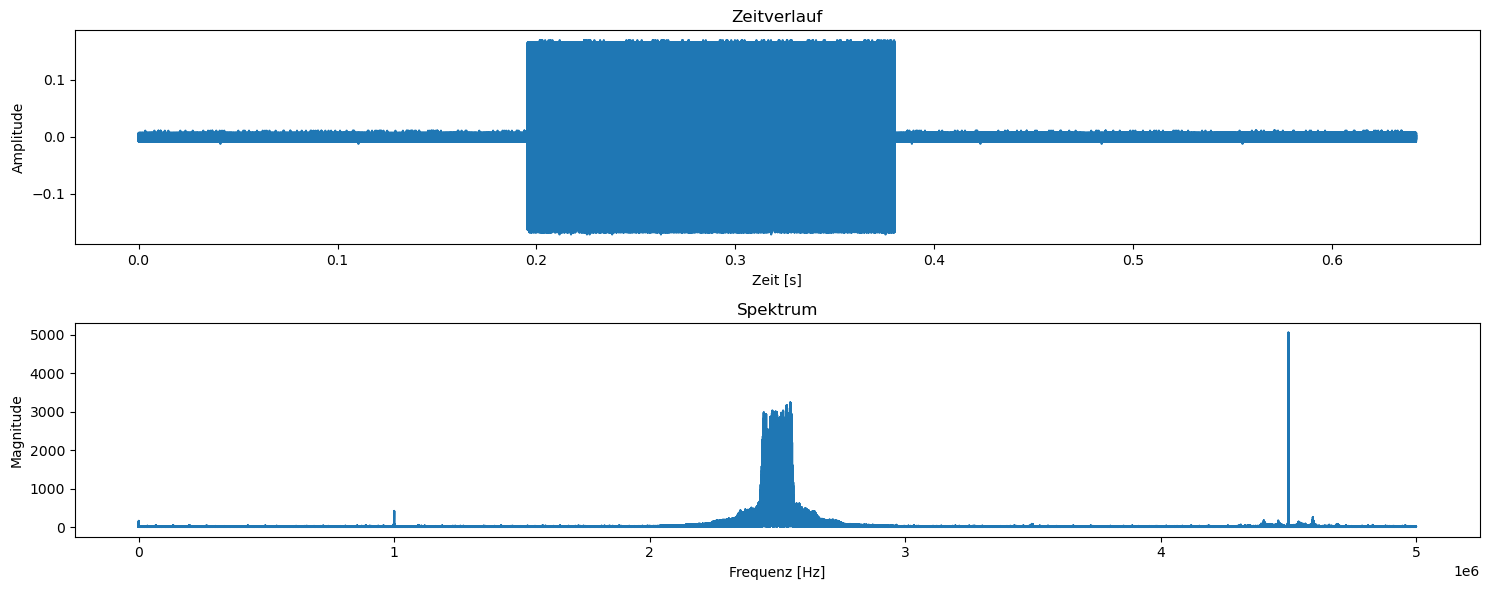

In [3]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

import soundfile as sf

# WAV-Datei einlesen
data, sample_rate = sf.read('15-08-28_435500000Hz.wav')

data0 = np.mean(data,axis=1)

# Zeitachse erstellen
time = np.arange(0, len(data0)) / sample_rate

# Plot Zeitverlauf
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(time, data0)
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.title('Zeitverlauf')

# Fourier-Transformation für das Spektrum
freqs = np.fft.fftfreq(len(data0), 1/sample_rate)
fft = np.fft.fft(data0)

# Plot Spektrum
plt.subplot(2, 1, 2)
plt.plot(np.abs(freqs), np.abs(fft))
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Magnitude')
plt.title('Spektrum')
plt.tight_layout()
plt.show()